In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from datetime import date, timedelta
from IPython.display import display
import seaborn as sns
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
sns.set_theme(style="whitegrid")

### Thu nhập dữ liệu :

In [15]:
header_by_day = ["#","Country","Date","TotalCases","NewCases","TotalDeaths","NewDeaths","TotalRecovered","NewRecovered",
"ActiveCases","Serious,Critical","Tot Cases/1M pop","Deaths/1M pop","TotalTests","Tests/1M pop","Population","Continent"]

header_by_week = ["#", "Country", "Cases in the last 7 days", "Cases in the preceding 7 days",
"Weekly case /%/ change", "Cases in the last 7 days/1M pop", "Deaths in the last 7 days", 
"Deaths in the preceding 7 days", "Weekly Death /%/ change", "Deaths in the last 7 days/1M pop", "Population", "Continent"]

In [16]:
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

def convert_numeric(num):
    condition = {",":"","+":"","%":""}
    if num == "nan" or num == " " or num == "  " or num == " N/A":
        return 0

    for i, j in condition.items():
        num = num.replace(i, j)
    if RepresentsInt(num) == True:
        return int(num)
    return float(num)

In [17]:
url_day='https://drive.google.com/file/d/1tyLwIH4ChVzFBOr1Mg9QJRntMY0SgRqu/view?usp=share_link'
url_day='https://drive.google.com/uc?id=' + url_day.split('/')[-2]

In [18]:
df_covid_by_day = pd.read_csv(url,sep='\t')

In [19]:
for i in range(3,16):
    df_covid_by_day[header_by_day[i]] = df_covid_by_day[header_by_day[i]].apply(lambda x:convert_numeric(str(x)))
    
df_covid_by_day[header_by_day[16]] = df_covid_by_day[header_by_day[16]].apply(lambda x:str(x).replace(" ",""))
df_covid_by_day['Date'] = pd.to_datetime(df_covid_by_day['Date'],format="%d-%m-%Y")

In [20]:
url_week='https://drive.google.com/file/d/1dGywd4ObvfsUcocPBVEG6eek19nI27Js/view?usp=share_link'
url_week='https://drive.google.com/uc?id=' + url_week.split('/')[-2]

In [21]:
df_covid_by_week = pd.read_csv(url_week,sep='\t')

In [22]:
for i in range(2,11):
    df_covid_by_week[header_by_week[i]] = df_covid_by_week[header_by_week[i]].apply(lambda x:convert_numeric(str(x)))
    
df_covid_by_week[header_by_week[-1]] = df_covid_by_week[header_by_week[-1]].apply(lambda x:str(x).replace(" ",""))

### Khám phá dữ liệu :

In [23]:
df_covid_by_day

,#,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,1,USA,2022-02-28,80656025,34828,975951,843,53500262,278579,26179812,7770,241322,2920,950614834,2844228,334225917,NorthAmerica
1,2,India,2022-02-28,42931045,6915,514054,211,42324550,16864,92441,8944,30610,367,767481346,547211,1402532051,Asia
2,3,Brazil,2022-02-28,28787620,19516,649443,248,26336373,152750,1801804,8318,133853,3020,63776166,296539,215068475,SouthAmerica
3,4,France,2022-02-28,22702815,13483,138367,232,20901504,235191,1662944,2484,346537,2112,246629975,3764574,65513384,Europe
4,5,UK,2022-02-28,18886701,27312,161361,46,17449650,98709,1275690,289,275806,2356,480341745,7014519,68478212,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,222,Western Sahara,2022-03-15,10,0,1,0,8,0,1,0,16,2,0,0,622266,Africa
2938,223,MS Zaandam,2022-03-15,9,0,2,0,7,0,0,0,0,0,0,0,0,nan
2939,224,Marshall Islands,2022-03-15,7,0,0,0,7,0,0,0,117,0,0,0,59868,Australia/Oceania
2940,225,Saint Helena,2022-03-15,2,0,0,0,2,0,0,0,327,0,0,0,6108,Africa


In [24]:
df_covid_by_day.dtypes

#                            int64
Country                     object
Date                datetime64[ns]
TotalCases                   int64
NewCases                     int64
TotalDeaths                  int64
NewDeaths                    int64
TotalRecovered               int64
NewRecovered                 int64
ActiveCases                  int64
Serious,Critical             int64
Tot Cases/1M pop             int64
Deaths/1M pop                int64
TotalTests                   int64
Tests/1M pop                 int64
Population                   int64
Continent                   object
dtype: object

In [25]:
df_covid_by_week

,#,Country,Cases in the last 7 days,Cases in the preceding 7 days,Weekly case /%/ change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death /%/ change,Deaths in the last 7 days/1M pop,Population,Continent
0,1,S. Korea,2358859,1596242,48.0,45942.0,1606,1112,44,31.0,51344146,Asia
1,2,Germany,1423375,1169650,22.0,16897.0,1233,1578,-22,15.0,84239076,Europe
2,3,Vietnam,1215604,1071853,13.0,12300.0,568,639,-11,6.0,98826293,Asia
3,4,France,484743,382263,27.0,7399.0,822,1042,-21,13.0,65518893,Europe
4,5,UK,466292,331863,41.0,6808.0,736,729,1,11.0,68491825,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,El Salvador,0,0,0.0,0.0,10,18,-44,2.0,6541804,NorthAmerica
210,211,Papua New Guinea,0,231,-100.0,0.0,0,1,-100,0.0,9234779,Australia/Oceania
211,212,St. Barth,0,22,-100.0,0.0,0,0,0,0.0,9928,NorthAmerica
212,213,Saint Martin,0,35,-100.0,0.0,0,0,0,0.0,39786,NorthAmerica


In [26]:
df_covid_by_week.dtypes

#                                     int64
Country                              object
Cases in the last 7 days              int64
Cases in the preceding 7 days         int64
Weekly case /%/ change              float64
Cases in the last 7 days/1M pop     float64
Deaths in the last 7 days             int64
Deaths in the preceding 7 days        int64
Weekly Death /%/ change               int64
Deaths in the last 7 days/1M pop    float64
Population                            int64
Continent                            object
dtype: object

### Phân chia dataset theo ngày thành 6 châu lục

Dữ liệu tuần không cần vì các chỉ số không cho phép ta groupby, nếu groupby sẽ bị sai lệch số liệu.

In [27]:
today = date.today()
yesterday = (today - timedelta(1)).strftime("%Y-%m-%d")
recent_day = '2022-03-11'

Đặt recent_day là 11/3/2022 vì đây là ngày cuối cùng crawl dữ liệu xem như là ngày hôm qua.

In [28]:
df_covid_yesterday = df_covid_by_day[df_covid_by_day['Date'] == recent_day]

In [29]:
df_covid_yesterday

,#,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
2488,227,Niue,2022-03-11,1,0,0,0,0,0,1,0,608,0,0,0,1645,Australia/Oceania
2489,1,USA,2022-03-11,81154960,39254,993044,1022,55757373,157198,24404543,4604,242776,2971,963805880,2883239,334278850,NorthAmerica
2490,2,India,2022-03-11,42987875,3614,515833,88,42431513,5185,40529,8944,30642,368,776894810,553777,1402902454,Asia
2491,3,Brazil,2022-03-11,29305114,55211,654612,465,27556598,0,1093904,8318,136233,3043,63776166,296482,215109695,SouthAmerica
2492,4,France,2022-03-11,23381279,72399,140029,149,22087946,76531,1153304,1928,356872,2137,246629975,3764348,65517319,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,222,Western Sahara,2022-03-11,10,0,1,0,8,0,1,0,16,2,0,0,622105,Africa
2711,223,MS Zaandam,2022-03-11,9,0,2,0,7,0,0,0,0,0,0,0,0,nan
2712,224,Marshall Islands,2022-03-11,7,0,0,0,7,0,0,0,117,0,0,0,59864,Australia/Oceania
2713,225,Saint Helena,2022-03-11,2,0,0,0,2,0,0,0,327,0,0,0,6108,Africa


In [30]:
continent_yesterday_df = df_covid_yesterday.groupby("Continent").sum().drop("nan").reset_index()
continent_yesterday_df = continent_yesterday_df.drop(["#","Tot Cases/1M pop","Deaths/1M pop","Tests/1M pop"],axis=1)
continent_yesterday_df['Date'] = yesterday
continent_yesterday_df['Date'] = pd.to_datetime(continent_yesterday_df['Date'],format="%Y-%m-%d")

Dataframe của 6 châu lục theo ngày hôm qua. Áp dụng cho nhiều chart khác nhau.

In [31]:
continent_yesterday_df

,Continent,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Date
0,Africa,11618028,6304,251670,94,10729048,5102,540052,1567,97253337,1394727991,2022-12-05
1,Asia,124484715,686376,1369342,1677,110923469,347821,6379153,29551,1964739325,4666576359,2022-12-05
2,Australia/Oceania,4117167,56281,8208,32,3553693,38824,485751,152,72267304,43406133,2022-12-05
3,Europe,164043426,801055,1736468,2147,140461204,840095,17058408,12150,2519614320,748392111,2022-12-05
4,NorthAmerica,95656193,59310,1424631,1303,68520668,186917,25701091,10527,1078360385,596900655,2022-12-05
5,SouthAmerica,55138045,86119,1266986,749,47548986,44497,2190247,12490,212019299,436758630,2022-12-05


Dataframe dựa theo thời gian cho line chart.

In [32]:
df_covid_time = df_covid_by_day.groupby("Date").sum().reset_index()
df_covid_time = df_covid_time.drop(["#","Tot Cases/1M pop","Deaths/1M pop","Tests/1M pop"],axis=1)
df_covid_time

,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population
0,2022-02-28,437173429,1128262,5976416,6045,366621406,2154754,60360176,74759,5864353102,7884712500
1,2022-03-01,438510827,1337398,5983229,6813,368695782,2074376,59615435,74737,5869547415,7884712500
2,2022-03-02,440290515,1590173,5992432,7756,370783860,1939726,59289172,75953,5881445441,7884917270
3,2022-03-03,440377632,1599844,5993186,7872,370787000,1942866,59371827,75953,5881556015,7885122041
4,2022-03-04,443707497,1646436,6009345,8022,374469187,1751635,58996442,71862,5897737771,7885326827
5,2022-03-05,445123567,1371131,6015068,5651,375967273,1407925,58908703,72014,5903514343,7885531595
6,2022-03-06,446397620,1158654,6020183,4135,373237627,1328479,58148380,71136,5907087283,7885736371
7,2022-03-07,447839847,1216094,6026998,4912,375661281,1799427,57141478,70224,5912809671,7885941139
8,2022-03-08,449527551,1622156,6035718,6945,377568640,1926545,56851261,69516,5922376940,7886145914
9,2022-03-09,451357530,1699924,6043267,6811,379497990,1643000,56737443,67937,5930919728,7886352337


### Câu 1 :

Bar Chart về:
- Tổng số ca nhiễm từng châu lục so với tổng dân số
- Tổng ca test so với tổng dân số
- Biểu đồ chồng giữa 3 thông số: tổng số ca nhiễm = tổng chết + ca nhiễm trong cộng đồng + tổng hồi phục

In [33]:
#hàm tính tỉ lệ
def cal_ratio(x,y):
    for i in continent_yesterday_df['Continent'].values:
        ratio = x/y
    return ratio

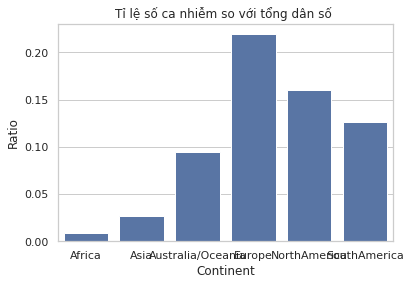

In [34]:
ratio = cal_ratio(continent_yesterday_df['TotalCases'],continent_yesterday_df['Population'])
#tạo dataframe tỉ lệ
df_case = pd.DataFrame({'Continent':continent_yesterday_df['Continent'].values, 'Ratio':ratio.values})
#vẽ barplot
sns.barplot(x="Continent", y="Ratio", data=df_case,color='b') 
plt.title('Tỉ lệ số ca nhiễm so với tổng dân số ')
plt.show()

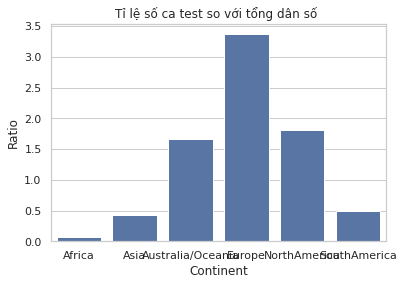

In [35]:
ratio = cal_ratio(continent_yesterday_df['TotalTests'],continent_yesterday_df['Population'])
df_test = pd.DataFrame({'Continent':continent_yesterday_df['Continent'].values, 'Ratio':ratio.values})

sns.barplot(x="Continent", y="Ratio", data=df_test,color='b') 
plt.title('Tỉ lệ số ca test so với tổng dân số ')
plt.show()


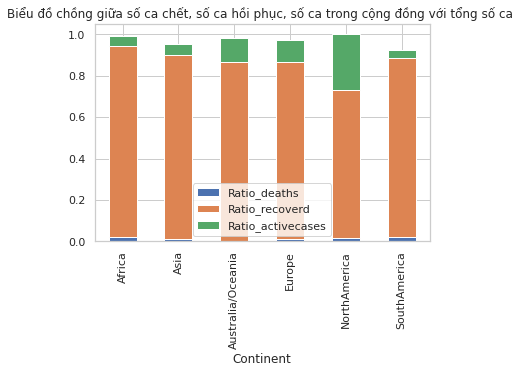

In [36]:
df = continent_yesterday_df.loc[:,['Continent','TotalCases','TotalDeaths','TotalRecovered','ActiveCases']]
ratio_deaths = cal_ratio(df['TotalDeaths'],df['TotalCases'])
ratio_recoverd = cal_ratio(df['TotalRecovered'],df['TotalCases'])
ratio_activecases = cal_ratio(df['ActiveCases'],df['TotalCases'])
df_plot = pd.DataFrame({'Continent':continent_yesterday_df['Continent'].values,
                        'Ratio_deaths':ratio_deaths.values,
                       'Ratio_recoverd':ratio_recoverd.values,
                       'Ratio_activecases':ratio_activecases.values})
df_plot.set_index('Continent').plot(kind='bar',stacked=True)
plt.title('Biểu đồ chồng giữa số ca chết, số ca hồi phục, số ca trong cộng đồng với tổng số ca ')
plt.show()

### Câu 2 :

Pie Chart để so sánh tỷ lệ % giữa 6 châu lục về các thông số 
- Số ca nhiễm MỚI
- Số ca tử vong MỚI
- Số ca hồi phục MỚI
- Số ca trong cộng đồng

Mỗi thông số là một biểu đồ, 100% chính là tổng 6 châu lục từng thông số

In [37]:
piechart_plots = continent_yesterday_df[['Continent','NewCases','NewDeaths','NewRecovered','ActiveCases']]

In [38]:
piechart_plots

,Continent,NewCases,NewDeaths,NewRecovered,ActiveCases
0,Africa,6304,94,5102,540052
1,Asia,686376,1677,347821,6379153
2,Australia/Oceania,56281,32,38824,485751
3,Europe,801055,2147,840095,17058408
4,NorthAmerica,59310,1303,186917,25701091
5,SouthAmerica,86119,749,44497,2190247


In [54]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs = specs, 
subplot_titles=['New Cases', 'New Deaths', 'New Recovered', 'Active Cases'])

fig.add_trace(go.Pie(labels=piechart_plots['Continent'], values=piechart_plots['NewCases']), 1, 1)
fig.add_trace(go.Pie(labels=piechart_plots['Continent'], values=piechart_plots['NewDeaths']), 1, 2)

fig.add_trace(go.Pie(labels=piechart_plots['Continent'], values=piechart_plots['NewRecovered']), 2, 1)
fig.add_trace(go.Pie(labels=piechart_plots['Continent'], values=piechart_plots['ActiveCases']), 2, 2)
fig.show(renderer='colab')

---

### Câu 3 :

Linechart để trực quan theo thời gian 3 thông số NEW (cases/deaths/recovered) trên toàn bộ thế giới.

In [40]:
linechart_plots = df_covid_time[['Date','NewCases','NewDeaths','NewRecovered']]

In [41]:
linechart_plots

,Date,NewCases,NewDeaths,NewRecovered
0,2022-02-28,1128262,6045,2154754
1,2022-03-01,1337398,6813,2074376
2,2022-03-02,1590173,7756,1939726
3,2022-03-03,1599844,7872,1942866
4,2022-03-04,1646436,8022,1751635
5,2022-03-05,1371131,5651,1407925
6,2022-03-06,1158654,4135,1328479
7,2022-03-07,1216094,4912,1799427
8,2022-03-08,1622156,6945,1926545
9,2022-03-09,1699924,6811,1643000


In [53]:
fig = px.line(linechart_plots, x="Date", y=['NewCases', 'NewDeaths','NewRecovered'], markers = True, title="World Overview") 
fig.show(renderer='colab')

Tiếp theo, ta chia từng châu lục theo thời gian với thông số giống với World.

In [43]:
continents = ["Europe","NorthAmerica","Asia","SouthAmerica","Australia/Oceania","Africa"]
df_covid_by_day_plots = df_covid_by_day[['Date','Continent','NewCases', 'NewDeaths','NewRecovered']]

In [55]:
for continent in continents:
    continent_df_day = df_covid_by_day_plots[df_covid_by_day_plots['Continent'] == continent]
    
    #continent_df_day.set_index('Date',inplace=True)
    continent_df_day = continent_df_day.groupby(by='Date').sum().reset_index()
    
    title = continent + " Overview"
    fig = px.line(continent_df_day, x="Date", y=['NewCases', 'NewDeaths','NewRecovered'], markers = True, title=title)
    fig.show(renderer='colab')

---

### Câu 4 :


Biểu đồ cột bar chart của 6 châu lục về 
- Weekly Case/%/Change
- Weekly Death/%/Change

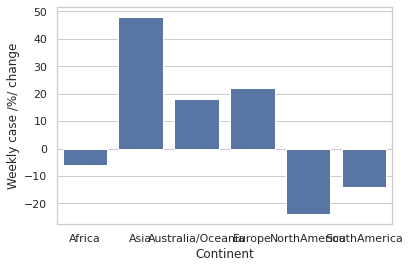

In [45]:
df = df_covid_by_week.groupby('Continent')
df = df.first().reset_index()
sns.barplot(x="Continent", y="Weekly case /%/ change", data=df,color='b') 
plt.show()

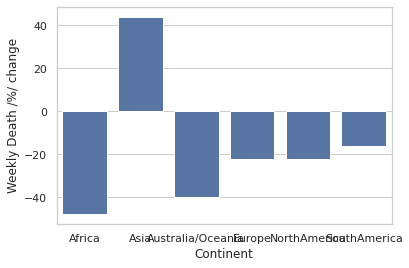

In [46]:
sns.barplot(x="Continent", y="Weekly Death /%/ change", data=df,color='b') 
plt.show()

### Câu 5 :



Boxplot trên các trường dữ liệu /1M pop ở df_covid_by_week:
- Cases in the last 7 days/1M pop
- Deaths in the last 7 days/1M pop

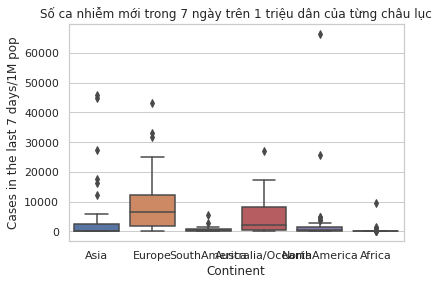

In [47]:
ax = sns.boxplot(x="Continent", y="Cases in the last 7 days/1M pop", data=df_covid_by_week)
plt.title('Số ca nhiễm mới trong 7 ngày trên 1 triệu dân của từng châu lục')
plt.show()

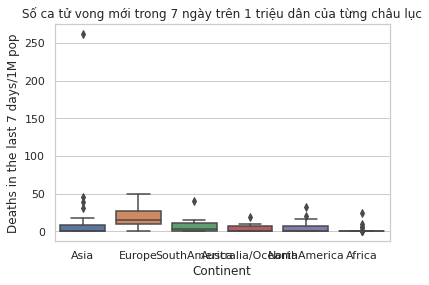

In [48]:
ax = sns.boxplot(x="Continent", y="Deaths in the last 7 days/1M pop", data=df_covid_by_week)
plt.title('Số ca tử vong mới trong 7 ngày trên 1 triệu dân của từng châu lục')
plt.show()

---

### Câu 6 :

Scatterplot để trực quan về mối quan hệ của hai cặp thông số:
- Tổng nhiễm / Tổng chết trên toàn thế giới.
- Ca nhiễm / ca chết trong 7 ngày gần đây / 1 triệu dân trên toàn thế giới.

In [59]:
scatterplot_df_day = df_covid_yesterday[['Country','TotalCases','TotalDeaths']]
fig = px.scatter(scatterplot_df_day, x='TotalCases', y='TotalDeaths',color='Country',title='Cases/Deaths with Total')
fig.update_layout(height=500, width=1200)
fig.show(renderer='colab')

In [60]:
scatterplot_df_week = df_covid_by_week[['Country','Cases in the last 7 days/1M pop','Deaths in the last 7 days/1M pop']]
fig = px.scatter(scatterplot_df_week, x='Cases in the last 7 days/1M pop', y='Deaths in the last 7 days/1M pop',color='Country',title='Cases/Deaths with 1M POP')
fig.update_layout(height=500, width=1200)
fig.show(renderer='colab')

---

### Câu 7

Heatmap được sử dụng để trực quan độ nóng của 6 châu lục về trường dữ liệu số ca nhiễm mới mỗi ngày. 

Các trường dữ liệu MỚI khác đều có chung mô hình nên không cần phải trực quan.

In [51]:
heatmapplot_day_df = df_covid_by_day_plots.groupby(by=['Date','Continent']).sum().reset_index()
heatmapplot_day_df = heatmapplot_day_df[heatmapplot_day_df['NewCases'] != 0]
heatmapplot_day_df['Date'] = heatmapplot_day_df['Date'].dt.strftime('%d-%m')
heatmapplot_day_df['Date'] = pd.Categorical(heatmapplot_day_df['Date'],categories=heatmapplot_day_df['Date'].unique(),ordered=True)

Text(0.5, 1.0, 'Số ca nhiễm mới mỗi ngày')

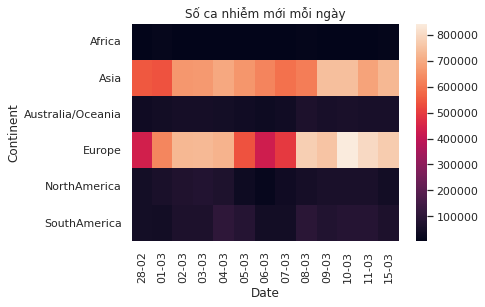

In [52]:
heatmapplot_day_df_NewCases = heatmapplot_day_df.pivot_table(index='Continent',columns='Date',values='NewCases')
ax = sns.heatmap(heatmapplot_day_df_NewCases)
ax.set_title("Số ca nhiễm mới mỗi ngày")